In [ ]:
import pandas as pd
import numpy as np
import torch
import pickle as pb
from sklearn.preprocessing import StandardScaler
from collections import Counter
import imblearn

## Random Forest All features

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_basic_ft.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/test_dataset_basic_ft.csv")

# train_dataset['article_length_bytes'] = np.log(train_dataset['article_length_bytes'])
# # train_dataset['image_article'] = train_dataset['no_of_images'] / train_dataset['article_length_bytes']
# train_dataset['no_of_references'] = np.log(train_dataset['no_of_references'])
# train_dataset['no_external_links'] = np.log(train_dataset['no_external_links'])
# train_dataset['no_of_non_citations'] = np.log(train_dataset['no_of_non_citations'])
# train_dataset['no_of_citations'] = np.log(train_dataset['no_of_citations'])

# test_dataset['article_length_bytes'] = np.log(test_dataset['article_length_bytes'])
# # test_dataset['image_article'] = test_dataset['no_of_images'] / test_dataset['article_length_bytes']
# test_dataset['no_of_references'] = np.log(test_dataset['no_of_references'])
# test_dataset['no_external_links'] = np.log(test_dataset['no_external_links'])
# test_dataset['no_of_non_citations'] = np.log(test_dataset['no_of_non_citations'])
# test_dataset['no_of_citations'] = np.log(test_dataset['no_of_citations'])

map_fn = {
    'Start':0,
    'Stub':1,
    'FA':2,
    'GA':3,
    'B':4,
    'C':5
}

train_read = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_readability.csv')
test_read = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_dataset_readability.csv')

train_pos = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_pos_feature.csv')
test_pos = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_dataset_pos_feature.csv')

train_write = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/train_dataset_writing_style.csv')
test_write = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/test_dataset_writing_style.csv')

train_symbols = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_symbol_count.csv')
test_symbols = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_symbol_count.csv')

train_symbols.drop('labels', axis=1, inplace=True)
test_symbols.drop('labels', axis=1, inplace=True)

# Writing style dataframe
cols = ['PassiveSent', 'Ques', 'AuxVerbs', 'ConjRate', 'Pronouns',
       'PreposRate', 'ToBeRate', 'ProAtB', 'ArticleAtB', 'ConjAtB',
       'SubConjAtB', 'IntProAtB']
train_write = train_write[cols]
test_write = test_write[cols]

# Readability dataframe
cols = ['flesh_reading', 'flesh_kincaid', 'smog_index', 'coleman_liau',
       'automated_readabilily', 'difficult_words', 'dale_chall_readability',
       'linsear_write_formula', 'gunning_fog']
train_read = train_read[cols]
test_read = test_read[cols]

# POS dataframe
train_pos.drop('sent_id', axis=1, inplace=True)
test_pos.drop('sent_id', axis=1, inplace=True)

# Load vectors
with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_vectors_768.pt', 'rb') as f:
    train_vectors = pb.load(f)

with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_vectors_768.pt', 'rb') as f:
    test_vectors = pb.load(f)

train_arrays = [vec.numpy() for vec in train_vectors]
test_arrays = [vec.numpy() for vec in test_vectors]

X_train = train_dataset.drop(['labels','text', 'seq_len'],axis=1)
y_train = train_dataset['labels'].map(map_fn).values
# X_train = np.array(train_arrays)
# features_list = X_train.columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + train_write.columns.tolist()
X_train = np.hstack((X_train.values, train_read.values, train_pos.values, train_write.values, train_arrays))

X_test = test_dataset.drop(['label', 'text'], axis=1)
y_test = test_dataset['label'].map(map_fn).values
# X_test = np.array(test_arrays)
X_test = np.hstack((X_test.values, test_read.values, test_pos.values, test_write.values, test_arrays))

from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier(n_estimators=150, min_samples_split=10, max_features='auto', max_depth=70, bootstrap=True)
rclf.fit(X_train, y_train)

score = rclf.score(X_test, y_test)
print('Random Forest Testing Accuracy', score)
print('Random Forest Training Accuracy', rclf.score(X_train, y_train))

Random Forest Testing Accuracy 0.6453587215232914
Random Forest Training Accuracy 0.9962649966045424


## LGB All features Data Augmentation

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_basic_ft.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/test_dataset_basic_ft.csv")

# train_dataset['article_length_bytes'] = np.log(train_dataset['article_length_bytes'])
# # train_dataset['image_article'] = train_dataset['no_of_images'] / train_dataset['article_length_bytes']
# train_dataset['no_of_references'] = np.log(train_dataset['no_of_references'])
# train_dataset['no_external_links'] = np.log(train_dataset['no_external_links'])
# train_dataset['no_of_non_citations'] = np.log(train_dataset['no_of_non_citations'])
# train_dataset['no_of_citations'] = np.log(train_dataset['no_of_citations'])

# test_dataset['article_length_bytes'] = np.log(test_dataset['article_length_bytes'])
# # test_dataset['image_article'] = test_dataset['no_of_images'] / test_dataset['article_length_bytes']
# test_dataset['no_of_references'] = np.log(test_dataset['no_of_references'])
# test_dataset['no_external_links'] = np.log(test_dataset['no_external_links'])
# test_dataset['no_of_non_citations'] = np.log(test_dataset['no_of_non_citations'])
# test_dataset['no_of_citations'] = np.log(test_dataset['no_of_citations'])

map_fn = {
    'Start':0,
    'Stub':1,
    'FA':2,
    'GA':3,
    'B':4,
    'C':5
}

train_read = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_readability.csv')
test_read = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_dataset_readability.csv')

train_pos = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_pos_feature.csv')
test_pos = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_dataset_pos_feature.csv')

train_write = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/train_dataset_writing_style.csv')
test_write = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/test_dataset_writing_style.csv')

train_symbols = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_symbol_count.csv')
test_symbols = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_symbol_count.csv')

train_symbols.drop('labels', axis=1, inplace=True)
test_symbols.drop('labels', axis=1, inplace=True)

# Writing style dataframe
cols = ['PassiveSent', 'Ques', 'AuxVerbs', 'ConjRate', 'Pronouns',
       'PreposRate', 'ToBeRate', 'ProAtB', 'ArticleAtB', 'ConjAtB',
       'SubConjAtB', 'IntProAtB']
train_write = train_write[cols]
test_write = test_write[cols]

# Readability dataframe
cols = ['flesh_reading', 'flesh_kincaid', 'smog_index', 'coleman_liau',
       'automated_readabilily', 'difficult_words', 'dale_chall_readability',
       'linsear_write_formula', 'gunning_fog']
train_read = train_read[cols]
test_read = test_read[cols]

# POS dataframe
train_pos.drop('sent_id', axis=1, inplace=True)
test_pos.drop('sent_id', axis=1, inplace=True)

# Load vectors
with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_vectors_768.pt', 'rb') as f:
    train_vectors = pb.load(f)

with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_vectors_768.pt', 'rb') as f:
    test_vectors = pb.load(f)

train_arrays = [vec.numpy() for vec in train_vectors]
test_arrays = [vec.numpy() for vec in test_vectors]

X_train = train_dataset.drop(['labels','text', 'seq_len'],axis=1)
y_train = train_dataset['labels'].map(map_fn).values
# X_train = np.array(train_arrays)
# features_list = X_train.columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + train_write.columns.tolist()
X_train = np.hstack((X_train.values, train_read.values, train_pos.values, train_write.values, train_arrays))

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
smote = SMOTE(sampling_strategy={0:20000, 1:20000, 2:20000, 3:20000, 4:20000, 5:20000}, k_neighbors=50)
X_new, y_new = smote.fit_resample(X_train, y_train)

X_new[:, 0] = np.log(X_new[:, 0])
X_new[:, 1] = np.log(X_new[:, 1])
X_new[:, 2] = np.log(X_new[:, 2])
X_new[:, 5] = np.log(X_new[:, 5])
X_new[:, 10] = np.log(X_new[:, 10])

X_test = test_dataset.drop(['label', 'text'], axis=1)
y_test = test_dataset['label'].map(map_fn).values
# X_test = np.array(test_arrays)
X_test = np.hstack((X_test.values, test_read.values, test_pos.values, test_write.values, test_arrays))


import lightgbm as lgb
# clf = lgb.LGBMClassifier(n_estimators=100)
clf = lgb.LGBMClassifier(objective='softmax', num_class=6)
clf.fit(X_new, y_new)

# predict the results
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf.predict(X_new)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_new, y_pred_train)))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (20000) in class 0 will be larger than the number of samples in the majority class (class #3 -> 4500)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (20000) in class 1 will be larger than the number of samples in the majority class (class #3 -> 4500)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (20000) in class 2 will be larger than the number of samples in the majority class (class #3 -> 4500)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number

LightGBM Model accuracy score: 0.6362
Training-set accuracy score: 0.8235


In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_basic_ft.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/test_dataset_basic_ft.csv")

train_dataset['article_length_bytes'] = np.log(train_dataset['article_length_bytes'])
# train_dataset['image_article'] = train_dataset['no_of_images'] / train_dataset['article_length_bytes']
train_dataset['no_of_references'] = np.log(train_dataset['no_of_references'])
train_dataset['no_external_links'] = np.log(train_dataset['no_external_links'])
train_dataset['no_of_non_citations'] = np.log(train_dataset['no_of_non_citations'])
train_dataset['no_of_citations'] = np.log(train_dataset['no_of_citations'])

test_dataset['article_length_bytes'] = np.log(test_dataset['article_length_bytes'])
# test_dataset['image_article'] = test_dataset['no_of_images'] / test_dataset['article_length_bytes']
test_dataset['no_of_references'] = np.log(test_dataset['no_of_references'])
test_dataset['no_external_links'] = np.log(test_dataset['no_external_links'])
test_dataset['no_of_non_citations'] = np.log(test_dataset['no_of_non_citations'])
test_dataset['no_of_citations'] = np.log(test_dataset['no_of_citations'])

map_fn = {
    'Start':0,
    'Stub':1,
    'FA':2,
    'GA':3,
    'B':4,
    'C':5
}

train_read = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_readability.csv')
test_read = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_dataset_readability.csv')

train_pos = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_dataset_pos_feature.csv')
test_pos = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_dataset_pos_feature.csv')

train_write = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/train_dataset_writing_style.csv')
test_write = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification//Basic-Features-Dataset/test_dataset_writing_style.csv')

train_symbols = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_symbol_count.csv')
test_symbols = pd.read_csv('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_symbol_count.csv')

train_symbols.drop('labels', axis=1, inplace=True)
test_symbols.drop('labels', axis=1, inplace=True)

# Writing style dataframe
cols = ['PassiveSent', 'Ques', 'AuxVerbs', 'ConjRate', 'Pronouns',
       'PreposRate', 'ToBeRate', 'ProAtB', 'ArticleAtB', 'ConjAtB',
       'SubConjAtB', 'IntProAtB']
train_write = train_write[cols]
test_write = test_write[cols]

# Readability dataframe
cols = ['flesh_reading', 'flesh_kincaid', 'smog_index', 'coleman_liau',
       'automated_readabilily', 'difficult_words', 'dale_chall_readability',
       'linsear_write_formula', 'gunning_fog']
train_read = train_read[cols]
test_read = test_read[cols]

# POS dataframe
train_pos.drop('sent_id', axis=1, inplace=True)
test_pos.drop('sent_id', axis=1, inplace=True)

# Load vectors
with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/train_vectors_768.pt', 'rb') as f:
    train_vectors = pb.load(f)

with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/test_vectors_768.pt', 'rb') as f:
    test_vectors = pb.load(f)

train_arrays = [vec.numpy() for vec in train_vectors]
test_arrays = [vec.numpy() for vec in test_vectors]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## LGB All Features without transformers vectors

In [ ]:
X_train = train_dataset.drop(['labels','text', 'seq_len'],axis=1)
y_train = train_dataset['labels'].map(map_fn).values
# X_train = np.array(train_arrays)
# features_list = X_train.columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + train_write.columns.tolist()
X_train = np.hstack((X_train.values, train_read.values, train_pos.values, train_write.values))

X_test = test_dataset.drop(['label', 'text'], axis=1)
y_test = test_dataset['label'].map(map_fn).values
# X_test = np.array(test_arrays)
X_test = np.hstack((X_test.values, test_read.values, test_pos.values, test_write.values))

import lightgbm as lgb
# clf = lgb.LGBMClassifier(n_estimators=100)
clf = lgb.LGBMClassifier(objective='softmax', num_class=6)
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

LightGBM Model accuracy score: 0.6250
Training-set accuracy score: 0.7566


# LGB All features

In [ ]:
X_train = train_dataset.drop(['labels','text', 'seq_len'],axis=1)
y_train = train_dataset['labels'].map(map_fn).values
# X_train = np.array(train_arrays)
# features_list = X_train.columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + train_write.columns.tolist()
X_train = np.hstack((X_train.values, train_read.values, train_pos.values, train_write.values, train_arrays))

X_test = test_dataset.drop(['label', 'text'], axis=1)
y_test = test_dataset['label'].map(map_fn).values
# X_test = np.array(test_arrays)
X_test = np.hstack((X_test.values, test_read.values, test_pos.values, test_write.values, test_arrays))

import lightgbm as lgb
# clf = lgb.LGBMClassifier(n_estimators=100)
clf = lgb.LGBMClassifier(objective='softmax', num_class=6)
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

LightGBM Model accuracy score: 0.6624
Training-set accuracy score: 0.8761


## LGB all features except writing features


In [ ]:
X_train = train_dataset.drop(['labels','text', 'seq_len'],axis=1)
y_train = train_dataset['labels'].map(map_fn).values
# X_train = np.array(train_arrays)
features_list = X_train.columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + [f'v{i}' for i in range(768)]
X_train = np.hstack((X_train.values, train_read.values, train_pos.values, train_arrays))

X_test = test_dataset.drop(['label', 'text'], axis=1)
y_test = test_dataset['label'].map(map_fn).values
# X_test = np.array(test_arrays)
X_test = np.hstack((X_test.values, test_read.values, test_pos.values, test_arrays))

import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators=100)
# clf = lgb.LGBMClassifier(objective='softmax', num_class=6)
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

LightGBM Model accuracy score: 0.6702
Training-set accuracy score: 0.8786


In [ ]:
X = np.concatenate([X_train, X_test], axis=0)
Y = np.concatenate([y_train, y_test], axis=0)

Y_prediction = clf.predict(X)
accuracy_score(Y, Y_prediction)

0.8577783814989642

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns

In [ ]:
reverse_map_fn = {value:key for key, value in map_fn.items()}

In [ ]:
reverse_map_fn

{0: 'Start', 1: 'Stub', 2: 'FA', 3: 'GA', 4: 'B', 5: 'C'}

In [ ]:
print('Train-Micro',f1_score(y_train, y_pred_train, average='micro'))
print('Train-Macro',f1_score(y_train, y_pred_train, average='macro'))
print('Train-Weighted',f1_score(y_train, y_pred_train, average='weighted'))

Train-Micro 0.8785935259941146
Train-Macro 0.8782984056772601
Train-Weighted 0.8773676057719313


In [ ]:
print('Test-Micro',f1_score(y_test, y_pred, average='micro'))
print('Test-Macro',f1_score(y_test, y_pred, average='macro'))
print('Test-Weighted',f1_score(y_test, y_pred, average='weighted'))

Test-Micro 0.6701802108126488
Test-Macro 0.6699689173879397
Test-Weighted 0.6681524413047661


Text(0.5, 1.0, 'Confusion Matrix')

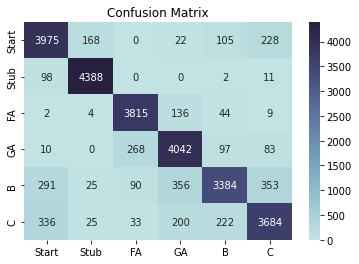

In [ ]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
# sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.0f')
train_confusion_matrix.index = reverse_map_fn.values()
train_confusion_matrix.columns = reverse_map_fn.values()

sns.heatmap(train_confusion_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

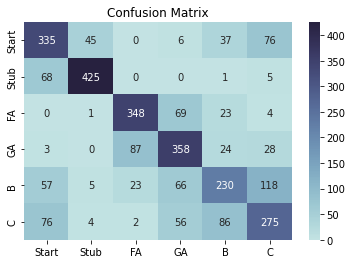

In [ ]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
# sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.0f')
test_confusion_matrix.index = reverse_map_fn.values()
test_confusion_matrix.columns = reverse_map_fn.values()

sns.heatmap(test_confusion_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Confusion Matrix')

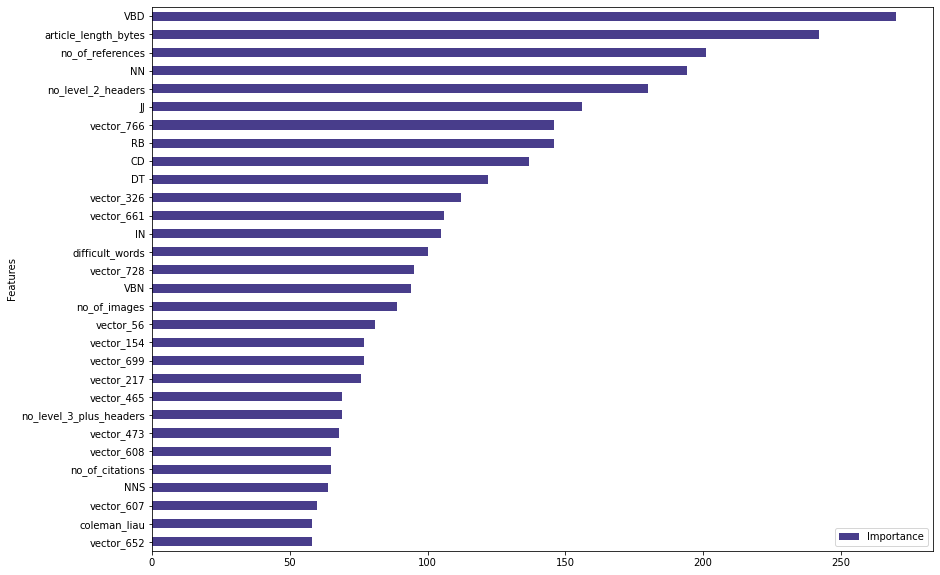

In [ ]:
features_list = train_dataset.drop(['labels','text', 'seq_len'],axis=1).columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + [f'vector_{i}' for i in range(768)]
features_df = pd.DataFrame(columns=['Features', 'Importance'])
features_df['Features'] = features_list
features_df['Importance'] = list(clf.feature_importances_)

features_df.sort_values(by='Importance', ascending=False)[:30][::-1].plot(kind='barh',  x='Features', figsize=(14,10), color='darkslateblue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


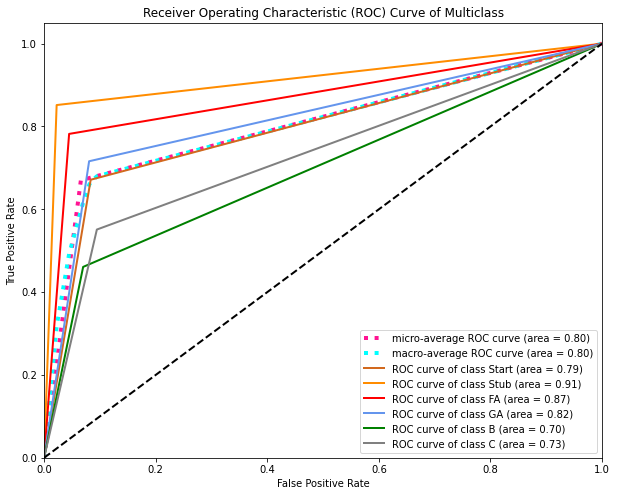

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

n_classes = 6

y_pred1 = label_binarize(y_pred, classes=[0,1,2,3,4,5])
y_test1 = label_binarize(y_test, classes=[0,1,2,3,4,5])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["chocolate", "darkorange", "red", 'cornflowerblue', 'green', 'grey'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(reverse_map_fn[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve of Multiclass")
plt.legend(loc="lower right")
plt.show()

## XGBoost All features

In [ ]:
X_train = train_dataset.drop(['labels','text', 'seq_len'],axis=1)
y_train = train_dataset['labels'].map(map_fn).values
# X_train = np.array(train_arrays)
# features_list = X_train.columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + train_write.columns.tolist()
X_train = np.hstack((X_train.values, train_read.values, train_pos.values, train_write.values, train_arrays))

X_test = test_dataset.drop(['label', 'text'], axis=1)
y_test = test_dataset['label'].map(map_fn).values
# X_test = np.array(test_arrays)
X_test = np.hstack((X_test.values, test_read.values, test_pos.values, test_write.values, test_arrays))

#xgboost
from xgboost import XGBClassifier
import time
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
preds_train=xgb.predict(X_train)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, preds_train)))

XGBoost's prediction accuracy is: 57.94
Time consumed for training: 691.217
Time consumed for prediction: 1.39593 seconds
Training-set accuracy score: 0.6081


In [ ]:
# Cross Validation K fold Training Set
train_acc = [0.9018975251517596, 0.8965487965360615, 0.8951948382715001, 0.8980813311826131, 0.8967229815773835]
test_acc = [0.5752122241086588, 0.6395585738539898, 0.6332144676515538, 0.6220071319409067, 0.6289692647308541]

train_avg = 0.8976890945438637
test_avg = 0.6197923324571926

## Transformers

In [ ]:
import torch
import pickle as pb
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

with open('/content/drive/MyDrive/Wikipedia-Quality-Classification/Basic-Features-Dataset/transformers_saved_labels_preds/output_preds_n_labels.pb', 'rb') as f:
    obj = pb.load(f)

train_labels = obj['train_labels']
train_preds = obj['train_preds']
val_labels = obj['val_labels']
val_preds = obj['val_preds']

def serialize_tensor(array):
    return np.concatenate([val.numpy() for val in array], axis=0)

train_labels = serialize_tensor(train_labels)
train_preds = serialize_tensor(train_preds)
val_labels = serialize_tensor(val_labels)
val_preds = serialize_tensor(val_preds)

print('Transformers Training Accuracy:', accuracy_score(train_labels, train_preds))
print('Transformers Testing Accuracy:', accuracy_score(val_labels, val_preds))

Transformers Training Accuracy: 0.7136497396815815
Transformers Testing Accuracy: 0.652839170350221


Text(0.5, 1.0, 'Confusion Matrix')

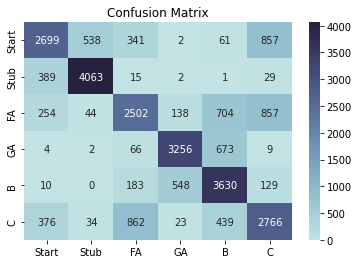

In [ ]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(train_labels, train_preds))
# sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.0f')
train_confusion_matrix.index = reverse_map_fn.values()
train_confusion_matrix.columns = reverse_map_fn.values()

sns.heatmap(train_confusion_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

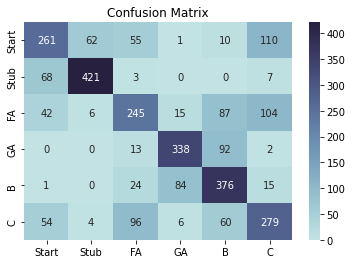

In [ ]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(val_labels, val_preds))
# sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.0f')
test_confusion_matrix.index = reverse_map_fn.values()
test_confusion_matrix.columns = reverse_map_fn.values()

sns.heatmap(test_confusion_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

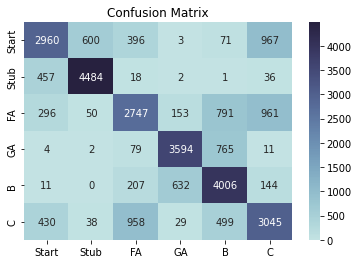

In [ ]:
sns.heatmap((train_confusion_matrix + test_confusion_matrix), annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Confusion Matrix')

In [ ]:
X = np.concatenate([X_train, X_test], axis=0)
Y = np.concatenate([y_train, y_test], axis=0)

Y_prediction = clf.predict(X)
print(accuracy_score(Y, Y_prediction))

reverse_map_fn = {value:key for key, value in map_fn.items()}

0.8577783814989642


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print('== F1 Score ==')
print('Train-Micro',f1_score(Y, Y_prediction, average='micro'))
print('Train-Macro',f1_score(Y, Y_prediction, average='macro'))
print('Train-Weighted',f1_score(Y, Y_prediction, average='weighted'))
print('=====')
print('Test-Micro',f1_score(Y, Y_prediction, average='micro'))
print('Test-Macro',f1_score(Y, Y_prediction, average='macro'))
print('Test-Weighted',f1_score(Y, Y_prediction, average='weighted'))

== F1 Score ==
Train-Micro 0.8577783814989642
Train-Macro 0.8574626660337259
Train-Weighted 0.8564399389232035
=====
Test-Micro 0.8577783814989642
Test-Macro 0.8574626660337259
Test-Weighted 0.8564399389232035


Text(0.5, 1.0, 'Confusion Matrix')

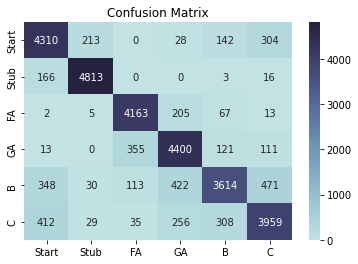

In [ ]:
train_confusion_matrix = pd.DataFrame(confusion_matrix(Y, Y_prediction))
# sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.0f')
train_confusion_matrix.index = reverse_map_fn.values()
train_confusion_matrix.columns = reverse_map_fn.values()

sns.heatmap(train_confusion_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

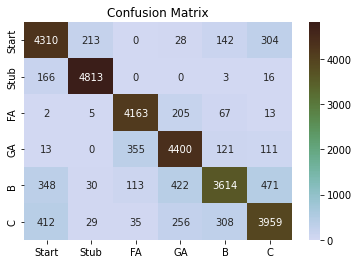

In [ ]:
test_confusion_matrix = pd.DataFrame(confusion_matrix(Y, Y_prediction))
# sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.0f')
test_confusion_matrix.index = reverse_map_fn.values()
test_confusion_matrix.columns = reverse_map_fn.values()

sns.heatmap(test_confusion_matrix, annot=True, fmt='.0f', cmap=sns.color_palette("ch:start=.6,rot=.9", as_cmap=True))
plt.title('Confusion Matrix')

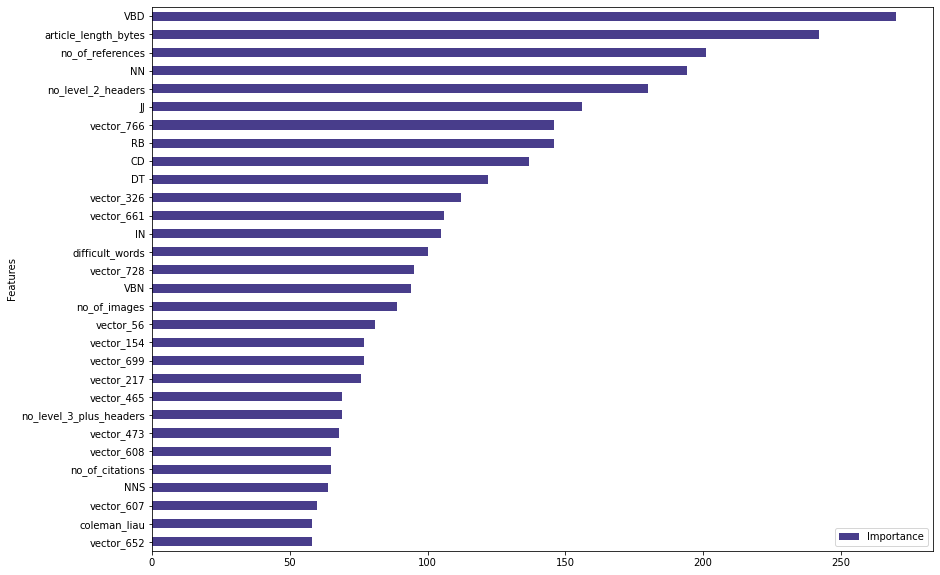

In [ ]:
features_list = train_dataset.drop(['labels','text', 'seq_len'],axis=1).columns.tolist() + train_read.columns.tolist() + train_pos.columns.tolist() + [f'vector_{i}' for i in range(768)]
features_df = pd.DataFrame(columns=['Features', 'Importance'])
features_df['Features'] = features_list
features_df['Importance'] = list(clf.feature_importances_)

features_df.sort_values(by='Importance', ascending=False)[:30][::-1].plot(kind='barh',  x='Features', figsize=(14,10), color='darkslateblue')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


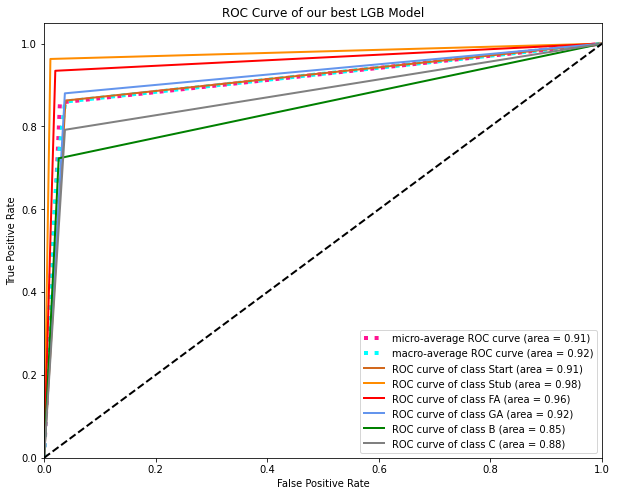

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

n_classes = 6

y_pred1 = label_binarize(Y_prediction, classes=[0,1,2,3,4,5])
y_test1 = label_binarize(Y, classes=[0,1,2,3,4,5])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="aqua",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["chocolate", "darkorange", "red", 'cornflowerblue', 'green', 'grey'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (area = {1:0.2f})".format(reverse_map_fn[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of our best LGB Model")
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print('===Precision===')
print('Micro Precision Score',precision_score(Y, Y_prediction, average='micro'))
print('Macro Precision Score',precision_score(Y, Y_prediction, average='macro'))
print('Weighted Precision Score',precision_score(Y, Y_prediction, average='weighted'))
print('===Recall===')
print('Micro Recall Score',recall_score(Y, Y_prediction, average='micro'))
print('Macro Recall Score',recall_score(Y, Y_prediction, average='macro'))
print('Weighted Recall Score',recall_score(Y, Y_prediction, average='weighted'))

===Precision===
Micro Precision Score 0.8577783814989642
Macro Precision Score 0.8581110986619614
Weighted Precision Score 0.8574802201715875
===Recall===
Micro Recall Score 0.8577783814989642
Macro Recall Score 0.8591676666242583


ValueError: ignored